In [181]:
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
class Foo(): 
    def __init__(self):
        x = 1 
        
    def prod(self, p): 
        if p == 1: 
            return 1.0
        else: 
            blah = self.prod(p - 1)
        
        return blah * p
        
        

In [156]:
class Bspline():
    # Implementing 1D B-splines with Cox-de Boor recursion formula

    def __init__(self, knot_vector, order):
        self.knot_vector = knot_vector
        self.order = order 
        self.n_basis = len(knot_vector) - order - 1

    def _get_zeroth_basis(self, x):
        # returns the a matrix of size n_basis x len(x)
        # where each row is the nth basis evaluated at x
        
        # if u_0, ..., u_{n_knots}, are the knots 
        # then the are the Nth basis is 1 if x \in (u_)
        
        zeroth_basis = np.zeros((len(self.knot_vector) - 1, len(x)))
        pos_basis_indx = np.searchsorted(self.knot_vector, x) - 1
        zeroth_basis[pos_basis_indx, np.arange(len(x))] = 1.0
        
        return zeroth_basis

    def _get_pth_order_basis(self, x, p, compute_derivatives=False):
        """Recursive Cox - de Boor function (for internal use).
        """
        assert len(np.shape(x)) == 1 # x should be a vector

        if p == 0:
            return self._get_zeroth_basis(x)
        else:
            basis_p_minus_1 = self._get_pth_order_basis(x, p - 1)
            
        
        print(p)        
        
        first_term_numerator = x[np.newaxis, :] - self.knot_vector[:-p][:, np.newaxis]
        first_term_denominator = self.knot_vector[p:] - self.knot_vector[:-p]

        second_term_numerator = self.knot_vector[(p + 1):][:, np.newaxis] - x[np.newaxis, :]
        second_term_denominator = (self.knot_vector[(p + 1):] -
                                   self.knot_vector[1:-p])
        
        first_term = first_term_numerator / first_term_denominator[:, np.newaxis]
        
        second_term = second_term_numerator / second_term_denominator[:, np.newaxis]


        return  (first_term[:-1] * basis_p_minus_1[:-1] +
                 second_term * basis_p_minus_1[1:])


In [174]:
knot_vector = np.linspace(0, 1, 10)

In [191]:
x = np.linspace(0.01, 0.99, 100)

In [192]:
basis_class = Bspline(knot_vector, 3)

In [193]:
basis_class._get_pth_order_basis(x, 0)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [194]:
bspline_basis = basis_class._get_pth_order_basis(x, 3)

1
2
3


In [195]:
bspline_basis

array([[1.21500000e-04, 9.57346982e-04, 3.21467255e-03, 7.60060819e-03,
        1.48222854e-02, 2.55868356e-02, 4.06013903e-02, 6.05730810e-02,
        8.62090392e-02, 1.18216396e-01, 1.57302284e-01, 2.03945167e-01,
        2.56853791e-01, 3.13911401e-01, 3.72996602e-01, 4.31988001e-01,
        4.88764201e-01, 5.41203810e-01, 5.87185432e-01, 6.24587673e-01,
        6.51289139e-01, 6.65168435e-01, 6.64229167e-01, 6.48665832e-01,
        6.20540089e-01, 5.81973334e-01, 5.35086961e-01, 4.82002364e-01,
        4.24840937e-01, 3.65724075e-01, 3.06773173e-01, 2.50109624e-01,
        1.97854824e-01, 1.52112167e-01, 1.13931030e-01, 8.27418371e-02,
        5.78374552e-02, 3.85107532e-02, 2.40545997e-02, 1.37618631e-02,
        6.92541210e-03, 2.83811508e-03, 7.92840596e-04, 8.24571751e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

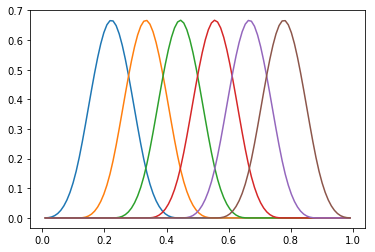

In [196]:
plt.plot(x, bspline_basis.T)

In [170]:
knot_vector

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [171]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747